<a href="https://colab.research.google.com/github/juanigp/CT-denoising/blob/master/Hyperparameter_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone -l -s git://github.com/juanigp/CT-denoising.git cloned-repo
%cd cloned-repo
from google.colab import drive
drive.mount('/gdrive', force_remount = True)

#import os
#from IPython.core.debugger import set_trace
#from models.EDCNN import EDCNN
#from utils import utils
#import torch
#import torch.nn as nn
#import torch.utils.data.sampler as sampler
#from torch.autograd import Variable
from matplotlib import pyplot as plt
#import random
import numpy as np
import pickle

Cloning into 'cloned-repo'...
remote: Enumerating objects: 229, done.
remote: Counting objects: 100% (229/229), done.
remote: Compressing objects: 100% (182/182), done.
remote: Total 229 (delta 111), reused 125 (delta 42), pack-reused 0
Receiving objects: 100% (229/229), 39.74 MiB | 28.70 MiB/s, done.
Resolving deltas: 100% (111/111), done.
/content/cloned-repo
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


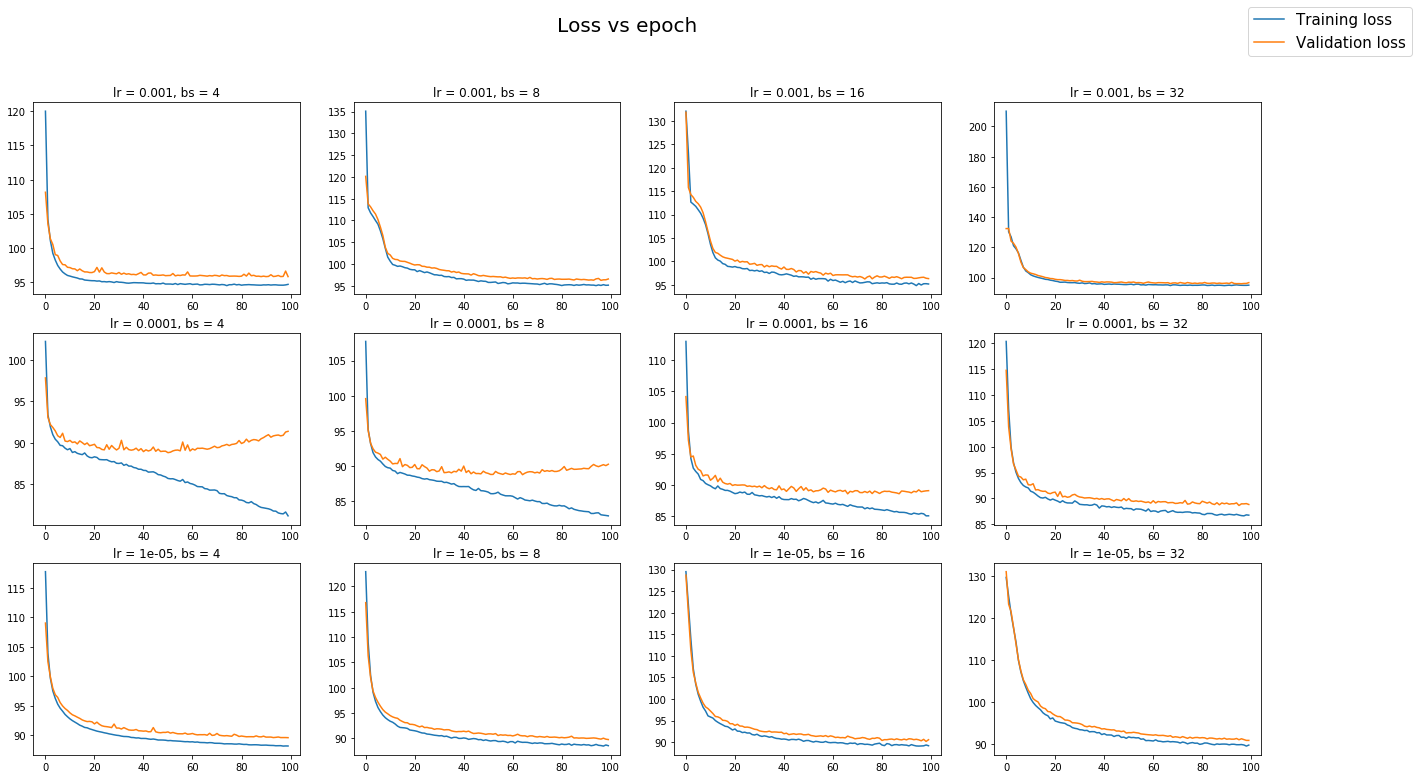

In [45]:
filename = r'/gdrive/My Drive/patches/hyperparams_analysis_2.txt'
with open(filename, "rb") as fp:   # Unpickling
  b = pickle.load(fp)

rows = 3
cols = 4

#creates a figure and axes object of rows and cols
fig, axs = plt.subplots(rows, cols, figsize = (22,12))
fig.suptitle('Loss vs epoch', fontsize = 20)
for i in range(rows):
    for j in range(cols):
        training_loss = b[0][i*cols + j][0]
        validation_loss = b[1][i*cols + j][0]
        axs[i, j].plot(training_loss)
        axs[i, j].plot(validation_loss)
        axs[i, j].set_title('lr = ' + str(b[0][i*cols + j][1]['lr'])+
                            ', bs = ' + str(b[0][i*cols + j][1]['batch_size']))
fig.legend(('Training loss', 'Validation loss'), loc='upper right', fontsize = 15)        
#plt.show()